In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [30]:
df=pd.read_csv("winequality-white.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [31]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [33]:
dt=DecisionTreeClassifier(random_state=42)

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred=dt.predict(x_test)

In [36]:
print('Decision Tree Classifier:')
print('Classification Report:\n',classification_report(y_test,y_pred))

Decision Tree Classifier:
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.24      0.28      0.26        25
           5       0.66      0.64      0.65       291
           6       0.64      0.63      0.63       432
           7       0.61      0.59      0.60       192
           8       0.31      0.49      0.38        35
           9       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.35      0.37      0.36       980
weighted avg       0.61      0.61      0.61       980



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
bc=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=42)

In [38]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [39]:
y_pred=bc.predict(x_test)

In [40]:
print('Bagging Classifier:')
print('Classification Report:\n',classification_report(y_test,y_pred))

Bagging Classifier:
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.62      0.32      0.42        25
           5       0.72      0.70      0.71       291
           6       0.67      0.79      0.73       432
           7       0.74      0.59      0.66       192
           8       0.76      0.46      0.57        35

    accuracy                           0.70       980
   macro avg       0.58      0.48      0.51       980
weighted avg       0.70      0.70      0.69       980



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#Pasting
pasting=BaggingClassifier(base_estimator=dt,n_estimators=100,bootstrap=False,random_state=42)

In [42]:
pasting.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, n_estimators=100, random_state=42)

In [43]:
y_pred=pasting.predict(x_test)

In [44]:
print('Pasting:')
print('Classification Report:\n',classification_report(y_test,y_pred))

Pasting:
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.25      0.32      0.28        25
           5       0.66      0.63      0.64       291
           6       0.64      0.64      0.64       432
           7       0.61      0.60      0.61       192
           8       0.36      0.46      0.41        35
           9       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.36      0.38      0.37       980
weighted avg       0.61      0.61      0.61       980



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
bagging=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=42,oob_score=True)

In [46]:
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, oob_score=True, random_state=42)

In [47]:
y_pred=bagging.predict(x_test)

In [48]:
#OOB SCORE
oob=bagging.oob_score_
print('Out Of Bag Score:',oob)

Out Of Bag Score: 0.6707503828483921


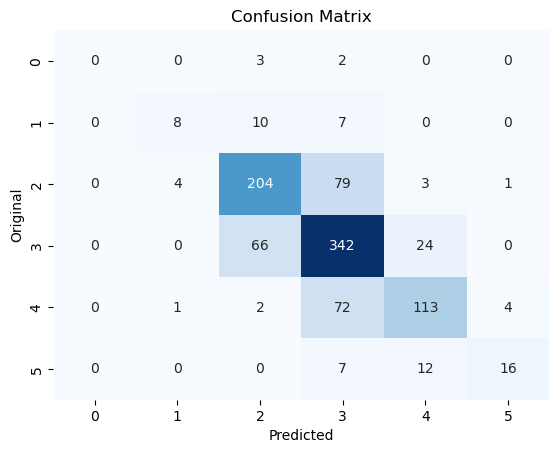

In [50]:
#Confusion Matrix
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,cbar=False,cmap=plt.cm.Blues,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.title('Confusion Matrix')
plt.show()


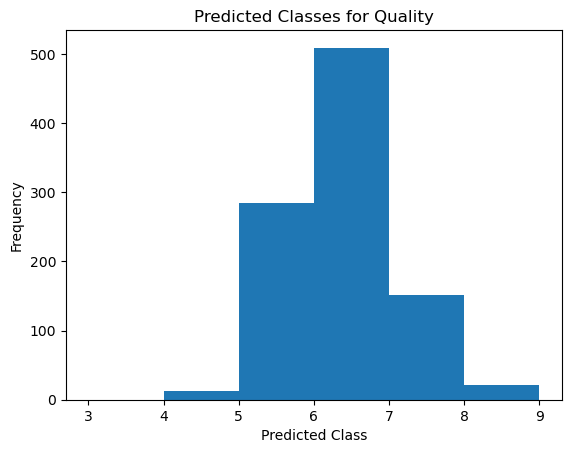

In [53]:
#Histogram
plt.hist(y_pred,bins=range(3,10))
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Predicted Classes for Quality')
plt.show()